In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
import colorcet
import seaborn as sns


import sklearn.metrics
import sklearn.neural_network
import sklearn.neighbors
import skimage.filters

In [4]:
from wassersteinwormhole import Wormhole

# Load MNIST data

In [5]:
import tensorflow.keras.datasets
mnist = tensorflow.keras.datasets.mnist

(image_train, label_train), (image_test, label_test) = mnist.load_data()

2024-03-28 10:27:29.439403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
thresh = skimage.filters.threshold_otsu(image_train.reshape([-1]))

In [7]:
pc_train = [np.stack(np.where(image>thresh), axis = 1) for image in image_train]
pc_test = [np.stack(np.where(image>thresh), axis = 1) for image in image_test]


## Show some examples

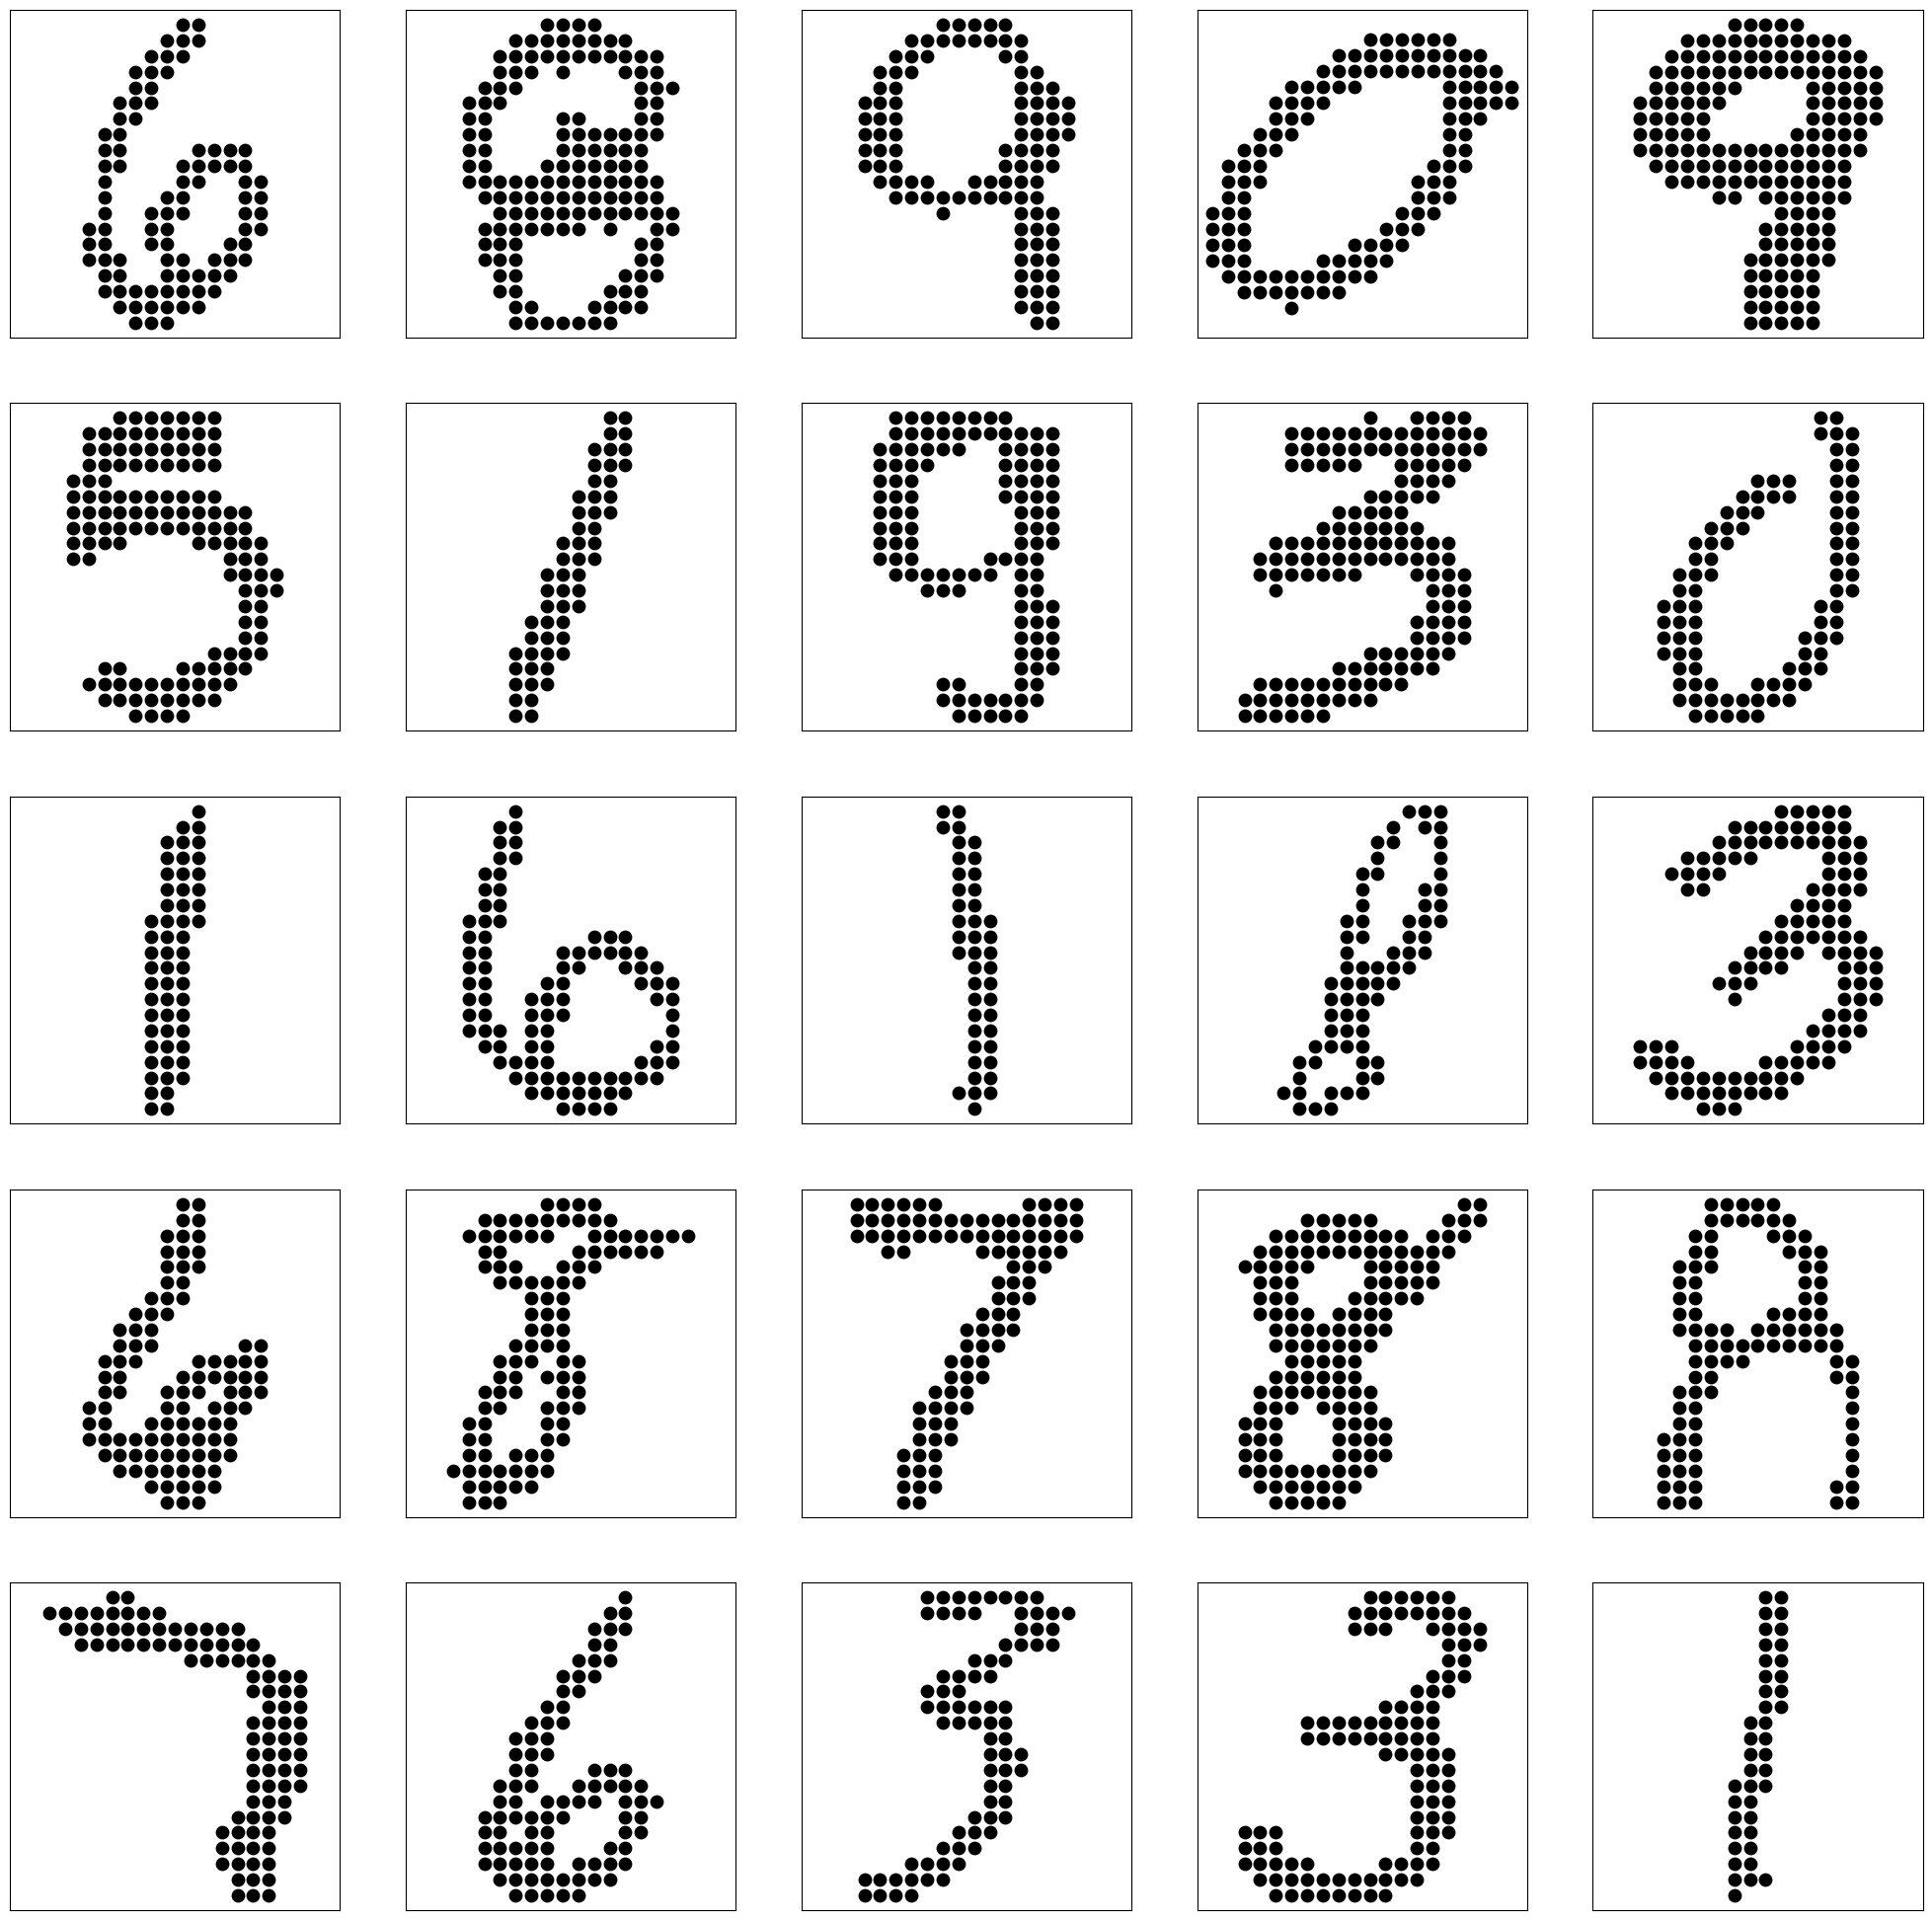

In [8]:
fig = plt.figure(figsize = (25,25))
for _ in range(25):
    ind = np.random.choice(np.arange(len(pc_train)))
    plt.subplot(5,5,1+_)
    plt.scatter(pc_train[ind][:, 1], -pc_train[ind][:, 0], c = 'black', s = 80)
    plt.xticks([])
    plt.yticks([])
    plt.axis('equal')
plt.show()

# Train Model

Run Wormhole with different batch sizes to see how it impacts training curves

In [9]:
WormholeModel = Wormhole(point_clouds = pc_train, point_clouds_test = pc_test)



Using Calculated Min Max Scaling Values


In [11]:
WormholeModel.train(compute_test = True)

 enc_loss: 3.157e-05 dec_loss: 1.027e-03 enc_corr: 0.984: 100%|██████████| 10000/10000 [23:51<00:00,  6.99it/s]


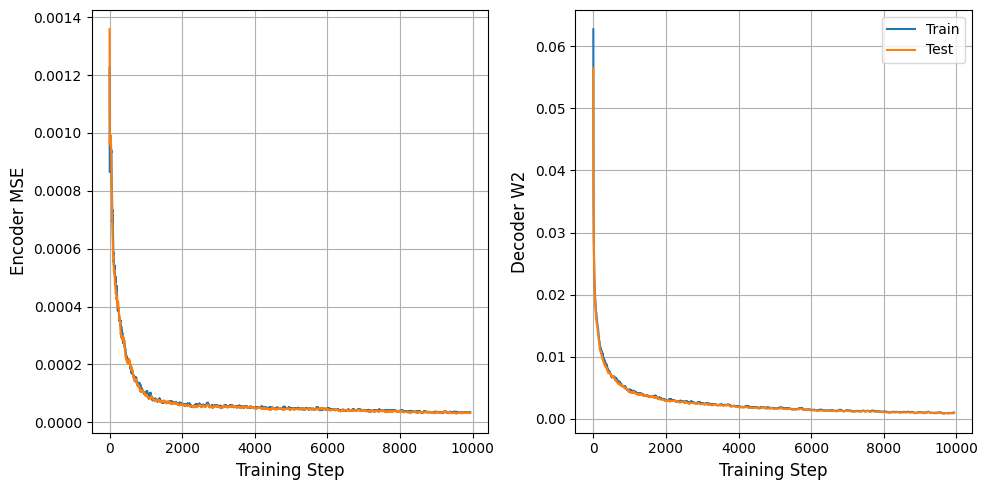

In [15]:
smooth = 64

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(np.convolve(WormholeModel.enc_loss, np.ones(smooth)/64, mode = 'valid'), label = f'Train')
plt.plot(np.convolve(WormholeModel.enc_loss_test, np.ones(smooth)/64, mode = 'valid'), label = f'Test')
plt.ylabel('Encoder MSE', fontdict={'size': 12})
plt.xlabel('Training Step', fontdict={'size': 12})
plt.grid()

plt.subplot(122)
plt.plot(np.convolve(WormholeModel.dec_loss, np.ones(smooth)/64, mode = 'valid'), label = f'Train')
plt.plot(np.convolve(WormholeModel.dec_loss_test, np.ones(smooth)/64, mode = 'valid'), label = f'Test')
plt.legend()
plt.ylabel('Decoder W2', fontdict={'size': 12})
plt.xlabel('Training Step', fontdict={'size': 12})
plt.tight_layout()
plt.grid()
plt.show()